# Logistic Regression 

  we will be working with a  advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

Sources https://stackabuse.com/predicting-customer-ad-clicks-via-machine-learning/
https://www.kaggle.com/fayomi/advertising/data#

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
Read in the advertising.csv file and set it to a data frame called ad_data.

In [4]:
import os as os
os.getcwd()

'/Users/ajaohri'

In [5]:
ad_data = pd.read_csv('/Users/ajaohri/Desktop/logit/advertising.csv')

Check the top few rows of ad_data

In [6]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Use info for looking at variable types  and describe() for numerical summeries on ad_data

In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exercise 1 - Exploratory Data Analysis

We use data visualization using seaborn package to explore the data!

Creating a histogram of the Age

Text(0.5, 0, 'Age')

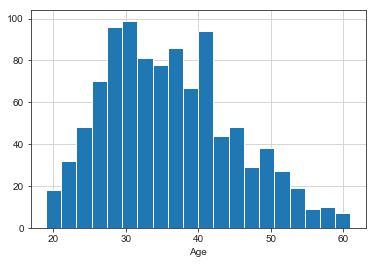

In [13]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ad_data['Age'].hist(bins=20)
plt.xlabel('Age')

In [ ]:
Creating a distribution plot

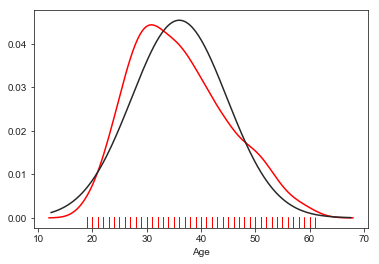

In [25]:
from scipy.stats import norm
sns.distplot(ad_data['Age'], hist=False, color='r', rug=True, fit=norm);

Creating a jointplot showing Area Income versus Age.

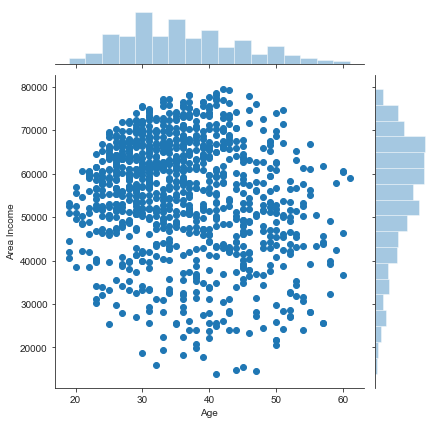

In [14]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

Create a jointplot showing the distributions (histograms) of Daily Time spent on site vs. Age.

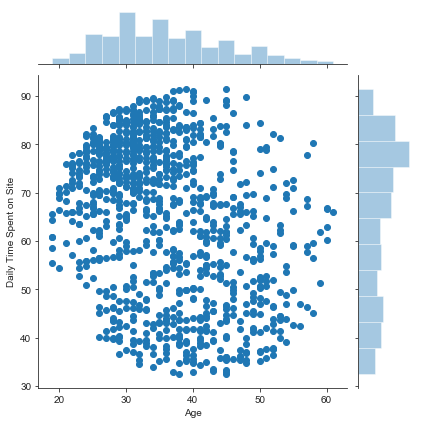

In [15]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data);

Creating a contour plot

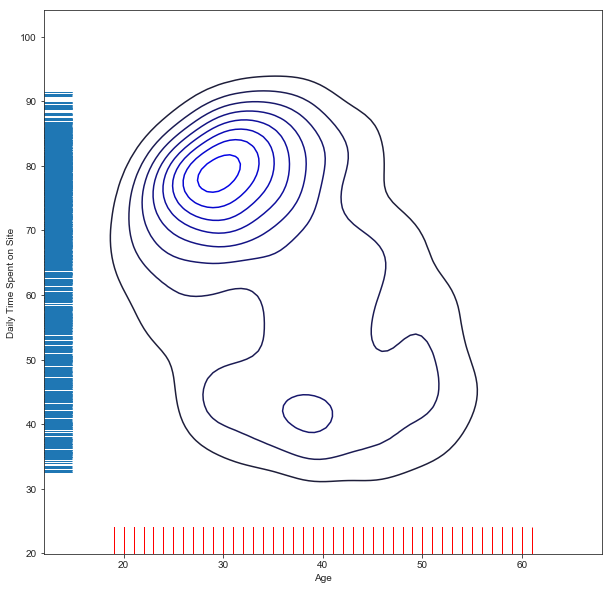

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(ad_data.Age, ad_data['Daily Time Spent on Site'], color="b", ax=ax)
sns.rugplot(ad_data.Age, color="r", ax=ax)
sns.rugplot(ad_data['Daily Time Spent on Site'], vertical=True, ax=ax)

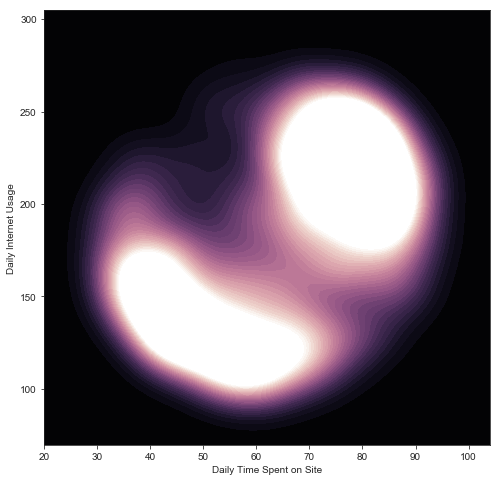

In [29]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(ad_data["Daily Time Spent on Site"], ad_data['Daily Internet Usage'],
    cmap=cmap, n_levels=100, shade=True);

Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

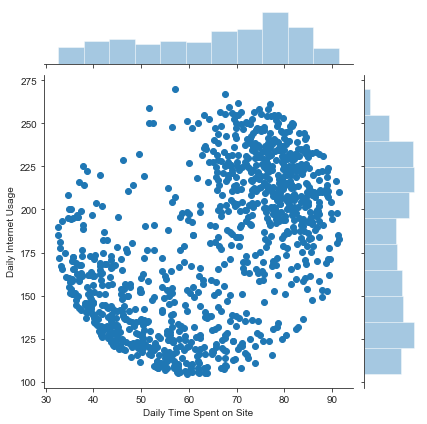

In [16]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)

Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

/Users/ajaohri/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ajaohri/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


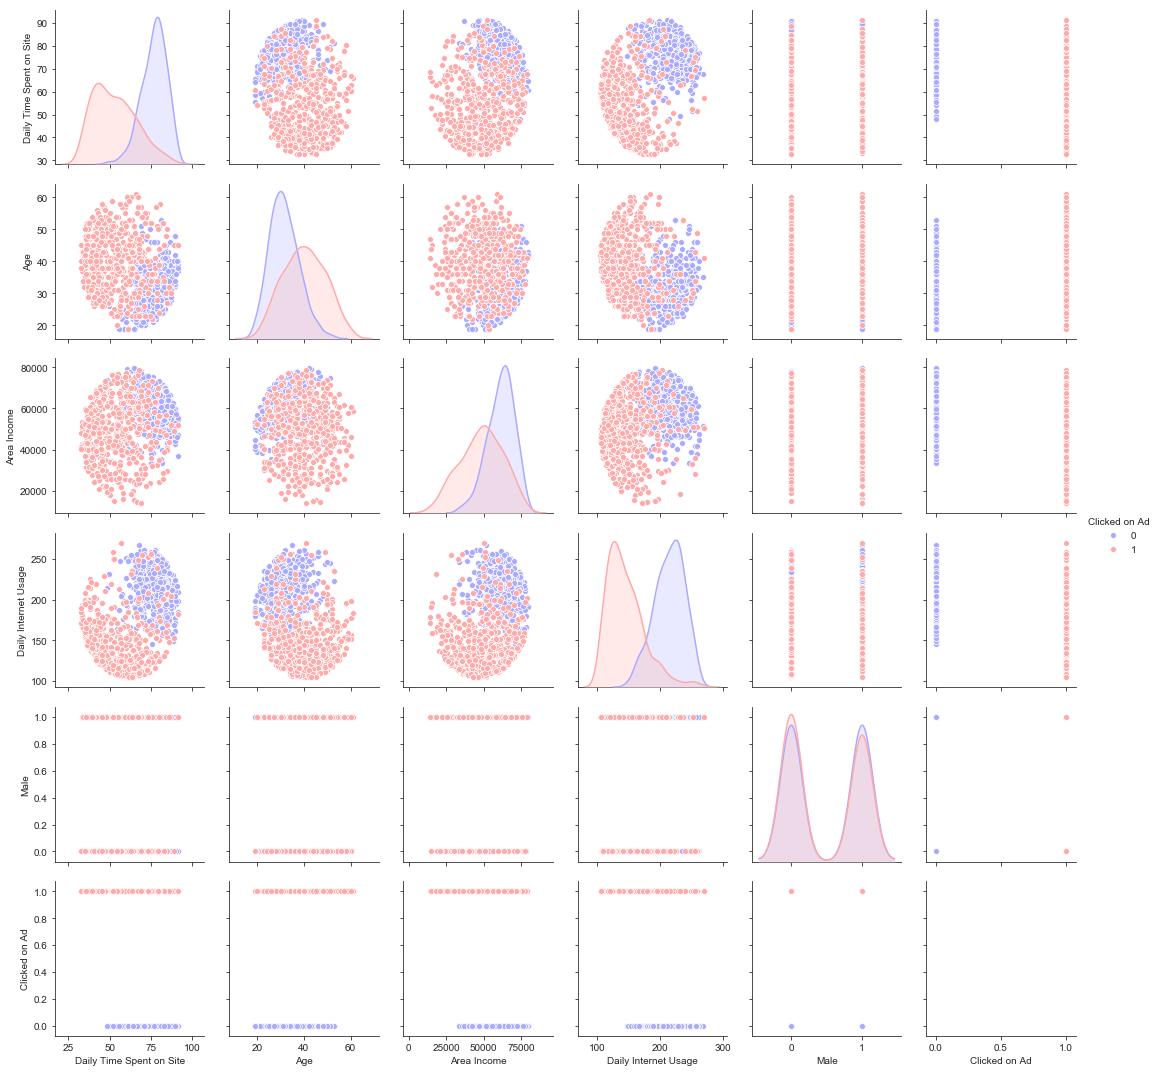

In [17]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

## Exercise 2 - Training Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

Split the data into training set and testing set using train_test_split

In [18]:
from sklearn.model_selection import train_test_split

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train and fit a logistic regression model on the training set.

In [19]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Exercise 3 - Predictions and Evaluations
Now predict values for the testing data.

In [20]:
predictions = logmodel.predict(X_test)

Create a classification report for the model.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



Create a confusion matrix for the model.

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[156,   6],
       [ 25, 143]])

Text(0.5, 1.05, 'Confusion_matrix')

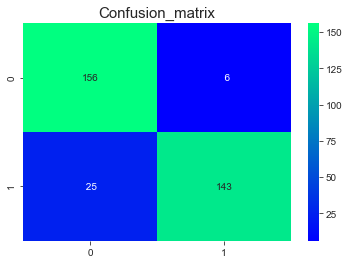

In [36]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

Draw ROC-curve for the model and compute AUC.

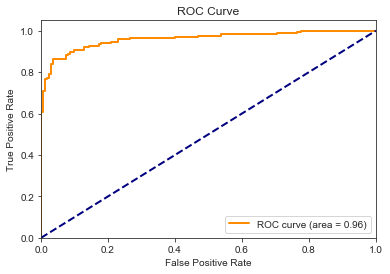

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

y_predict_probabilities = logmodel.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Alternative Approach

In [40]:
#https://www.kaggle.com/konchada/logistic-vs-random-forest-model-for-ad-click

import  statsmodels.api  as sm
import statsmodels.formula.api as smf

from scipy import stats
  


In [41]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

logit = sm.Logit(y, X)
  # fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.254291
         Iterations 7


In [43]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.6331
Time:                        13:01:38   Log-Likelihood:                -254.29
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                1.123e-188
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0618      0.008     -7.582      0.000      -0.078      -0.046
Age                          0.2629      0.017     15.426      0.000       0.230       0.

In [45]:
# odds ratios only
print(np.exp(result.params))

Daily Time Spent on Site    0.940112
Age                         1.300760
Area Income                 0.999984
Daily Internet Usage        0.975799
Male                        1.178049
dtype: float64
